In [13]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [14]:
df_path='C:/Users/anton/Documents/Master 2/Mémoire/Scripts/climategrid_196104.csv'
#df_path='C:/Users/anton/Documents/Master 2/Mémoire/Scripts/climategrid_196306.csv'
#df_path='C:/Users/anton/Documents/Master 2/Mémoire/Scripts/climategrid_201406.csv'
df=pd.read_csv(df_path,delimiter=';')
df.head()
#df['precip_quantity'].mean()

,pixel_id,day,temp_max,temp_min,temp_avg,precip_quantity,humidity_relative,sun_duration,short_wave_from_sky,evapotrans_ref
0,1,1961/04/01,10.49,5.99,8.24,2.63,97.01,NaN,NaN,NaN
1,1,1961/04/02,11.77,7.22,9.49,8.13,91.70,NaN,NaN,NaN
2,1,1961/04/03,11.72,7.91,9.81,7.51,92.01,NaN,NaN,NaN
3,1,1961/04/04,16.94,7.68,12.31,0.92,81.77,NaN,NaN,NaN
4,1,1961/04/05,18.69,9.21,13.95,0.89,75.91,NaN,NaN,NaN


In [15]:
mean_precip = df.groupby('pixel_id')['precip_quantity'].mean().reset_index()
mean_precip.head()

,pixel_id,precip_quantity
0,1,3.169333
1,2,3.227000
2,3,3.178000
3,4,3.150000
4,5,2.924000


In [16]:
coord_path='C:/Users/anton/Documents/Master 2/Mémoire/Scripts/climategrid_pixel_metadata.csv'
pixel_coord=pd.read_csv(coord_path,delimiter=';')
pixel_coord.head()


,PIXEL_ID,PIXEL_LAT_CENTER,PIXEL_LON_CENTER
0,1,49.510015,5.419101
1,2,49.509469,5.488333
2,3,49.508882,5.557563
3,4,49.508253,5.626792
4,5,49.554969,5.419910


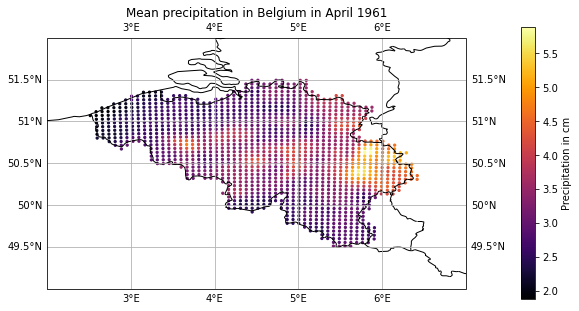

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and add a map projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Set longitude and latitude limits
ax.set_extent([2, 7, 49, 52], crs=ccrs.PlateCarree())

#plot the pixels with the mean precipitation
merged_df = pd.merge(pixel_coord, mean_precip, left_on='PIXEL_ID', right_on='pixel_id')
sc = ax.scatter(
    merged_df['PIXEL_LON_CENTER'], 
    merged_df['PIXEL_LAT_CENTER'], 
    c=merged_df['precip_quantity'], 
    cmap='inferno', 
    s=5
)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Precipitation in cm')

plt.title('Mean precipitation in Belgium in April 1961')
plt.show()

In [18]:
merged_df.head()

,PIXEL_ID,PIXEL_LAT_CENTER,PIXEL_LON_CENTER,pixel_id,precip_quantity
0,1,49.510015,5.419101,1,3.169333
1,2,49.509469,5.488333,2,3.227000
2,3,49.508882,5.557563,3,3.178000
3,4,49.508253,5.626792,4,3.150000
4,5,49.554969,5.419910,5,2.924000
